In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
import seaborn as sns
import bootcamp_utils_code as cdf
import scipy.special
from numpy import copy, sort, amax, arange, exp, sqrt, abs, floor, searchsorted
from scipy.misc import factorial, comb
import itertools

from matplotlib.transforms import Affine2D
from matplotlib.projections import PolarAxes
from mpl_toolkits.axisartist import angle_helper
from mpl_toolkits.axisartist.grid_finder import MaxNLocator
from mpl_toolkits.axisartist.floating_axes import GridHelperCurveLinear, FloatingSubplot

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf']

sns.set(style='whitegrid', palette="deep", rc={'axes.labelsize': 16})
flatui = ['#d74B4B','#389c65','#d74B4B']
sns.set_palette(flatui)

# The following is specific Jupyter notebooks
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}


In [2]:
###PLOT ACTIN DRUG TREATMENT

#load data actin
df= pd.read_csv('recap_microtubules_all_conditions.csv',comment='#')
df_col = pd.read_csv('recap_microtubules_wt_cytod_columnorga.csv',comment='#')
list_column_name=list(df.columns.values)


In [3]:
list_column_name=list(df.columns.values)

angle_wt_rectangles = df.loc[2:,['wt.1']].dropna()
angle_wt_control = df.loc[2:,['wt']].dropna()
angle_cytod_rectangles = df.loc[2:,['cytod.1']].dropna()
angle_cytod_control= df.loc[2:,['cytod']].dropna()

angle_control_wt = angle_wt_control.iloc[:,0].astype(np.float)
angle_rectangles_wt = angle_wt_rectangles.iloc[:,0].astype(np.float)
angle_control_cytod = angle_cytod_control.iloc[:,0].astype(np.float)
angle_rectangles_cytod = angle_cytod_rectangles.iloc[:,0].astype(np.float)
#angle_actin_control_wt

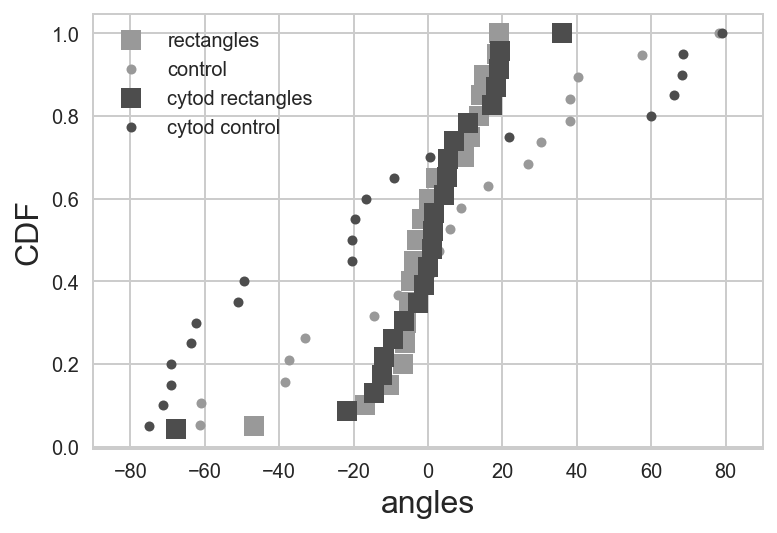

In [4]:

x_angle_rectangles_wt, y_rectangles_wt = cdf.ecdf(angle_rectangles_wt , formal=False)
x_angle_control_wt, y_control_wt = cdf.ecdf(angle_control_wt , formal=False)
x_angle_rectangles_cytod, y_rectangles_cytod = cdf.ecdf(angle_rectangles_cytod , formal=False)
x_angle_control_cytod, y_control_cytod = cdf.ecdf(angle_control_cytod , formal=False)

# 2. Make smooth curves
x = np.linspace(-90, 90, 100)
cdf_control_wt = scipy.stats.norm.cdf(x, loc=np.mean(angle_control_wt), scale=np.std(angle_control_wt))

cdf_rectangles_wt = scipy.stats.norm.cdf(x, loc=np.mean(angle_rectangles_wt), scale=np.std(angle_rectangles_wt))


cdf_control_cytod = scipy.stats.norm.cdf(x, loc=np.mean(angle_control_cytod), scale=np.std(angle_control_cytod))

cdf_rectangles_cytod = scipy.stats.norm.cdf(x, loc=np.mean(angle_rectangles_cytod), scale=np.std(angle_rectangles_cytod))


# Set up a figure with set of axes
fig, ax = plt.subplots(1, 1)

# Add axis labels
_ = ax.set_xlabel('angles')
_ = ax.set_ylabel('CDF');
_ = ax.set_xlim(-90,90)

#paint data on the figure plot panel
#_ = ax.plot(cc_iptg, gfp_int, marker='.')
#_ = ax.plot(x_angle_boot_sample, y_boot_sample, marker='.', ms=10, linestyle='none')


_ = ax.plot(x_angle_rectangles_wt, y_rectangles_wt, marker='s', ms=10, linestyle='none', color='0.6')
_ = ax.plot(x_angle_control_wt, y_control_wt, marker='.', ms=10, linestyle='none', color='0.6')
_ = ax.plot(x_angle_rectangles_cytod, y_rectangles_cytod, marker='s', ms=10, linestyle='none',color='0.3')
_ = ax.plot(x_angle_control_cytod, y_control_cytod, marker='.', ms=10, linestyle='none',color='0.3')


# Add a legend
plt.legend(('rectangles','control','cytod rectangles','cytod control'), loc='upper left');


#save figure as a pdf
plt.savefig('fig_microtubules_control_rectangle_wt_cytod_treatment.pdf', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)

plt.show()

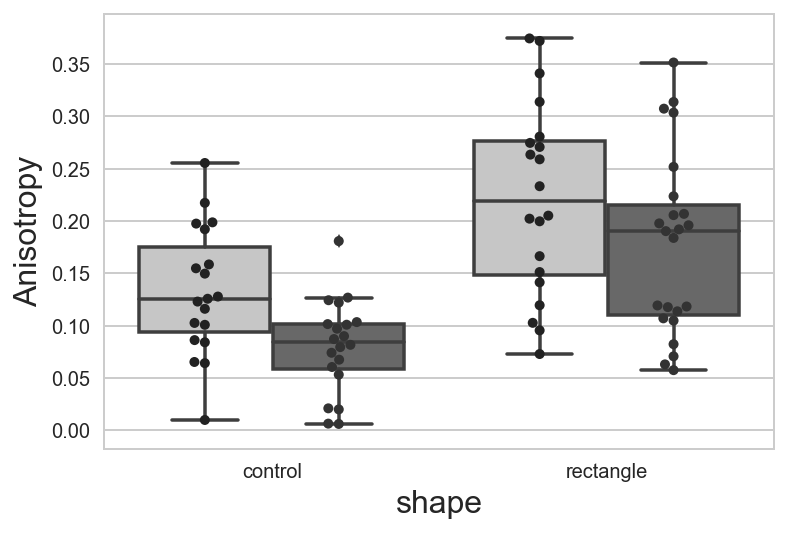

In [5]:
#df_act_col_drop=df_act_col.drop(index='act25',level=1)

ax = sns.boxplot(x = 'shape', y='anisotropy',hue='genotype_treatment', data=df_col, palette="Greys")
ax = sns.swarmplot(x = 'shape', y='anisotropy',hue='genotype_treatment', data=df_col, dodge=True, color='0.2')
ax.set_ylabel('Anisotropy')
ax.set_alpha(0.2)
ax.legend_.remove()

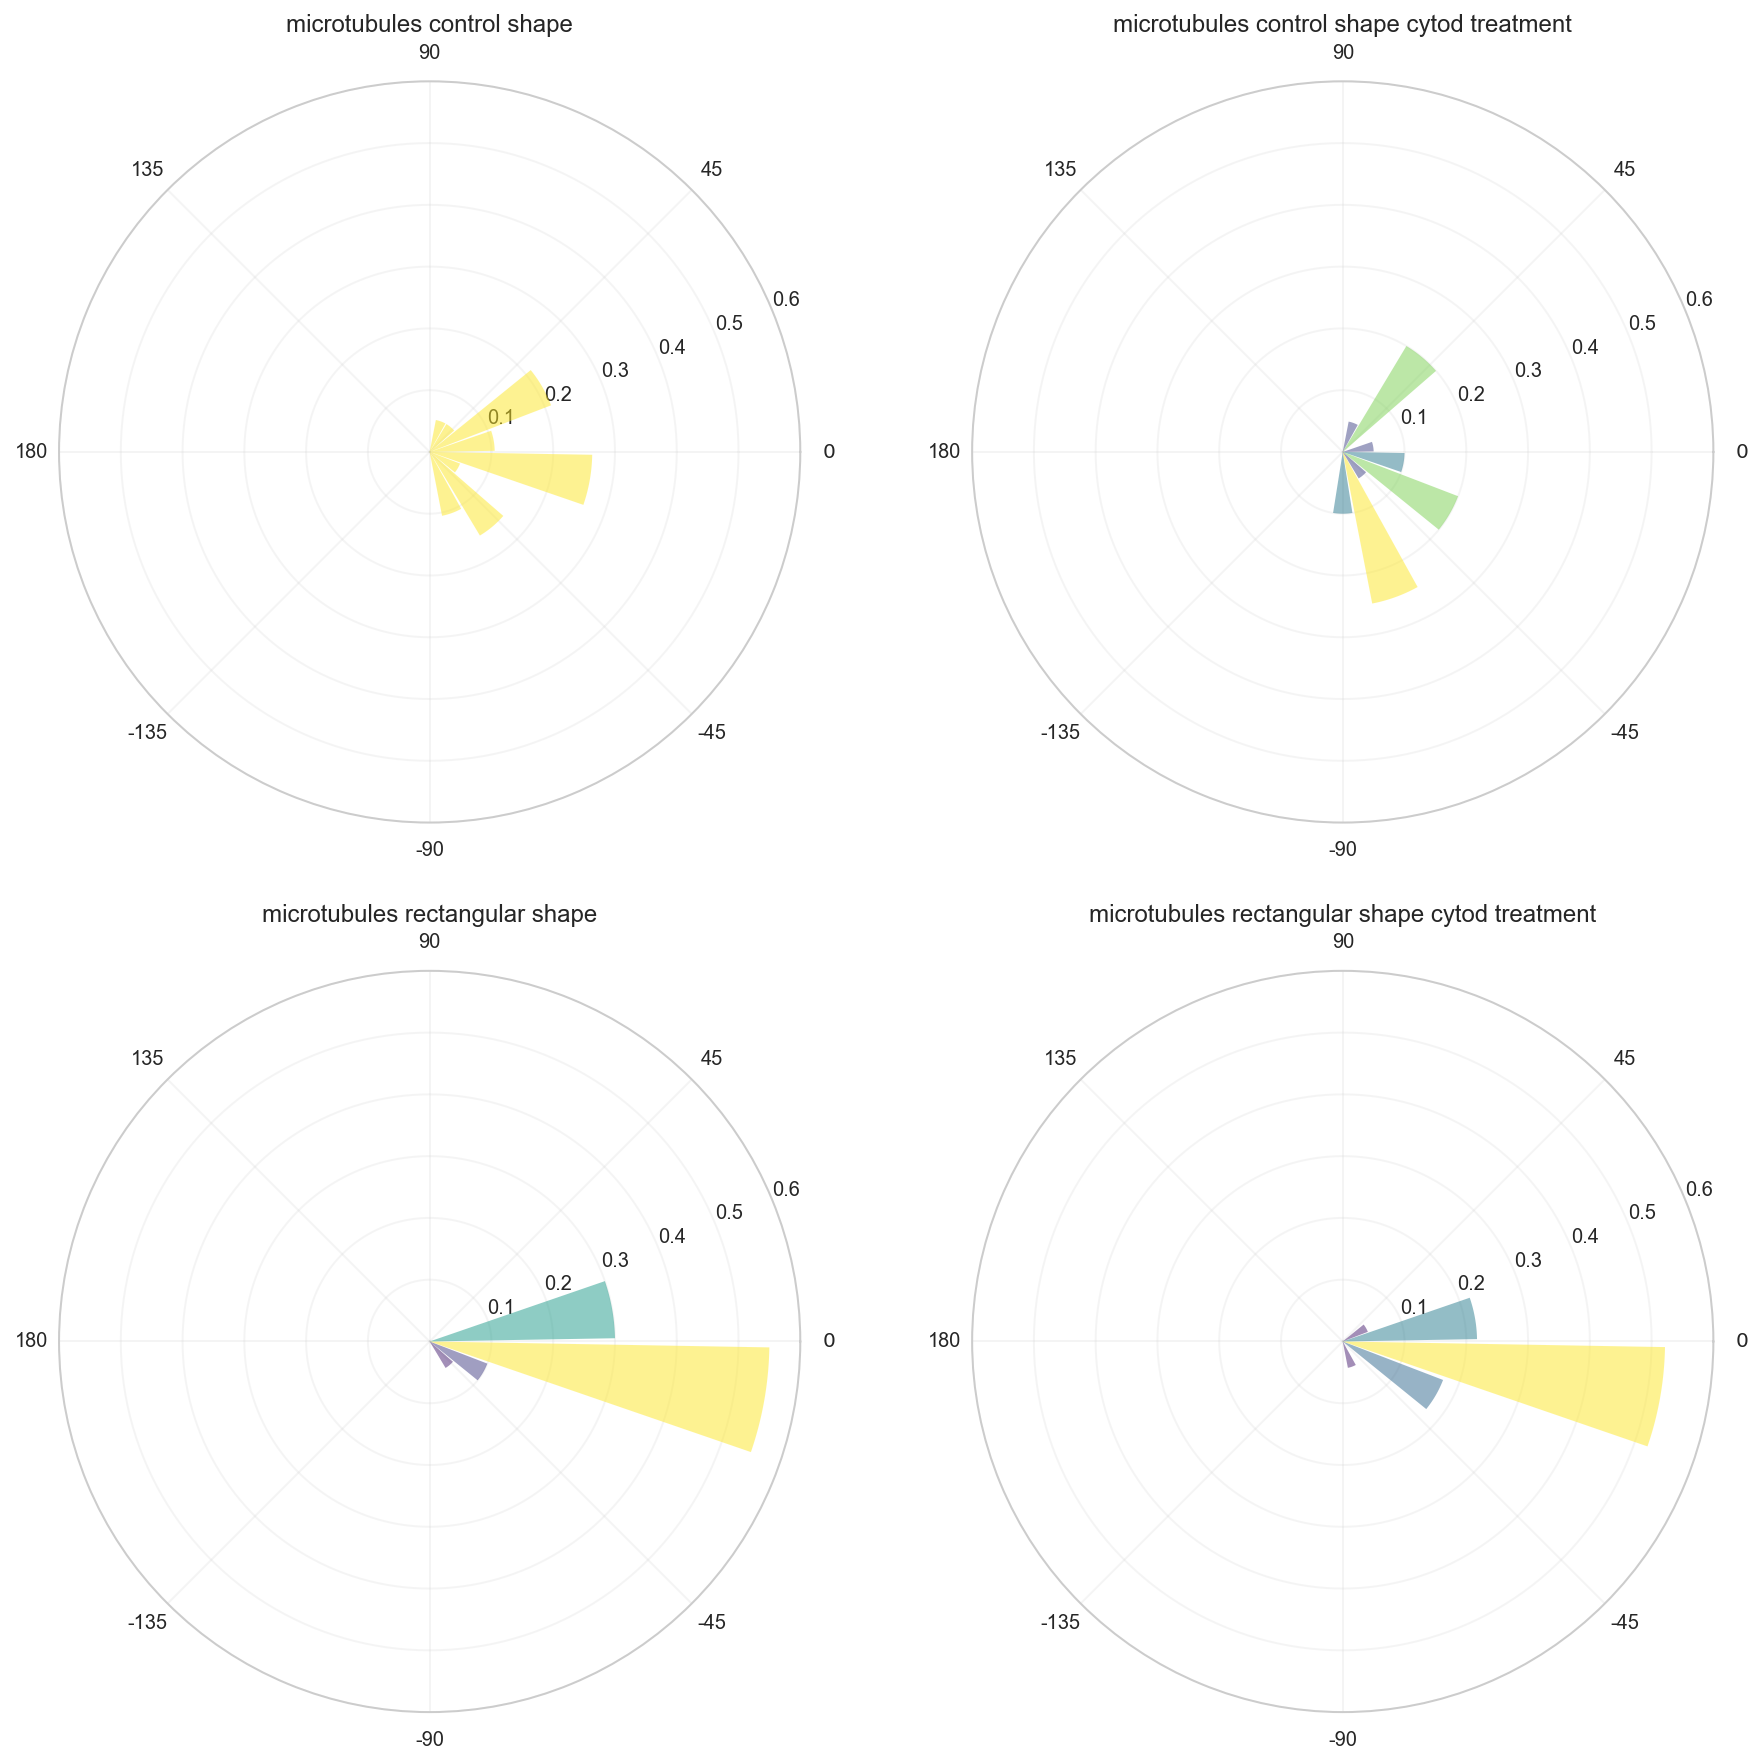

In [9]:
### POLAR PLOT ACTIN WT AND ORYZ CONTROL RECTANGLES

###PLOT actin average angle distrib

bin_test=np.arange(-90, 90, 1)
binning = np.arange(-90,91, 20)

fig, axes = plt.subplots(2, 2,  subplot_kw=dict(polar=True),figsize=(15,15))
#fig.subplots_adjust(hspace=1)

freq_cont_wt, theta = np.histogram(angle_control_wt, 
                           bins=binning)

freq_rectangles_wt, theta = np.histogram(angle_rectangles_wt, 
                           bins=binning)

freq_cont_cytod, theta = np.histogram(angle_control_cytod, 
                           bins=binning)

freq_rectangles_cytod, theta = np.histogram(angle_rectangles_cytod , 
                           bins=binning)

width = np.pi/len(theta)

#first plot control

freq_norm_cont_wt=freq_cont_wt/len(angle_control_wt)
amp = freq_norm_cont_wt.max()*1.

bars_cont=axes[0,0].bar(theta[:-1]*np.pi/180., freq_norm_cont_wt, width=width )#bottom=amp/2)
axes[0,0].set_title("microtubules control shape")
axes[0,0].set_ylim([0, 0.6])
                    
for f, bar in zip(freq_cont_wt, bars_cont):
    bar.set_facecolor(plt.cm.viridis(f/amp))
    bar.set_alpha(0.5)



xticks=True
if xticks:
        # Label angles according to convention
        angle_pos = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4]
        angle_label = ['$0$','45','90','135', '180','-135','-90','-45']
        axes[0,0].set_xticks(angle_pos)
        axes[0,0].set_xticklabels(angle_label)
else:
        ax.set_xticks([])
axes[0,0].grid(alpha=0.2)
        
#second plot circles

freq_norm_cont_cytod=freq_cont_cytod/len(angle_control_cytod)
amp = freq_cont_cytod.max()*1.

bars_circles=axes[0,1].bar(theta[:-1]*np.pi/180., freq_norm_cont_cytod, width=width )#bottom=amp/2)
axes[0,1].set_title("microtubules control shape cytod treatment")

axes[0,1].set_ylim([0, 0.6])
for f, bar in zip(freq_cont_cytod, bars_circles):
    bar.set_facecolor(plt.cm.viridis(f/amp))
    bar.set_alpha(0.5)

xticks=True
if xticks:
        # Label angles according to convention
        angle_pos = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4]
        angle_label = ['$0$','45','90','135', '180','-135','-90','-45']
        axes[0,1].set_xticks(angle_pos)
        axes[0,1].set_xticklabels(angle_label)
else:
        ax.set_xticks([])

axes[0,1].grid(alpha=0.2)
        
#third plot squares


freq_norm_rect_wt=freq_rectangles_wt/len(angle_rectangles_wt)
amp = freq_rectangles_wt.max()*1.

bars_squares=axes[1,0].bar(theta[:-1]*np.pi/180., freq_norm_rect_wt, width=width )#bottom=amp/2)
axes[1,0].set_title("microtubules rectangular shape")
axes[1,0].set_ylim([0, 0.6])
for f, bar in zip(freq_rectangles_wt, bars_squares):
    bar.set_facecolor(plt.cm.viridis(f/amp))
    bar.set_alpha(0.5)

xticks=True
if xticks:
        # Label angles according to convention
        angle_pos = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4]
        angle_label = ['$0$','45','90','135', '180','-135','-90','-45']
        axes[1,0].set_xticks(angle_pos)
        axes[1,0].set_xticklabels(angle_label)
else:
        ax.set_xticks([])

axes[1,0].grid(alpha=0.2)
#4th plot triangles


freq_norm_rect_cytod=freq_rectangles_cytod/len(angle_rectangles_cytod)
amp = freq_rectangles_cytod.max()*1.

bars_triangles=axes[1,1].bar(theta[:-1]*np.pi/180., freq_norm_rect_cytod, width=width )#bottom=amp/2)
axes[1,1].set_title("microtubules rectangular shape cytod treatment")
axes[1,1].set_ylim([0, 0.6])
for f, bar in zip(freq_rectangles_cytod, bars_triangles):
    bar.set_facecolor(plt.cm.viridis(f/amp))
    bar.set_alpha(0.5)

xticks=True
if xticks:
        # Label angles according to convention
        angle_pos = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi, 5*np.pi/4, 3*np.pi/2, 7*np.pi/4]
        angle_label = ['$0$','45','90','135', '180','-135','-90','-45']
        axes[1,1].set_xticks(angle_pos)
        axes[1,1].set_xticklabels(angle_label)
else:
        ax.set_xticks([])
axes[1,1].grid(alpha=0.2)


In [11]:
control_anisotropy = df.loc[2:,['wt.2']].dropna()
control_anisotropy = control_anisotropy.iloc[:,0].astype(np.float)

rectangles_anisotropy = df.loc[2:,['wt.3']].dropna()
rectangles_anisotropy = rectangles_anisotropy.iloc[:,0].astype(np.float)

control_anisotropy_cytod = df.loc[2:,['cytod.2']].dropna()
control_anisotropy_cytod = control_anisotropy_cytod.iloc[:,0].astype(np.float)

rectangles_anisotropy_cytod = df.loc[2:,['cytod.3']].dropna()
rectangles_anisotropy_cytod = rectangles_anisotropy_cytod.iloc[:,0].astype(np.float)


stat_controls_rectangles_ani_wt = ks_2samp(control_anisotropy,rectangles_anisotropy)
stat_controls_rectangles_ani_cytod = ks_2samp(control_anisotropy_cytod,rectangles_anisotropy_cytod)
stat_controls_ani_wt_cytod = ks_2samp(control_anisotropy,control_anisotropy_cytod)
stat_rectangles_ani_wt_cytod = ks_2samp(rectangles_anisotropy,rectangles_anisotropy_cytod)

stat_controls_rectangles_ani_wt

Ks_2sampResult(statistic=0.5447368421052632, pvalue=0.0034172606022560637)

In [12]:
results_all_stat_ani= [stat_controls_rectangles_ani_wt,stat_controls_rectangles_ani_cytod,stat_controls_ani_wt_cytod,stat_rectangles_ani_wt_cytod]
df_stats_ani = pd.DataFrame(results_all_stat_ani, columns=('stat', 'pvalue'))
df_stats_ani['test_type']= ['KS_cont_rect_wt','KS_cont_rect_cytod','KS_cont_wt_cytod','KS_rect_wt_cytod']

df_stats_ani


stat    pvalue           test_type
0  0.544737  0.003417     KS_cont_rect_wt
1  0.626087  0.000203  KS_cont_rect_cytod
2  0.434211  0.034893    KS_cont_wt_cytod
3  0.302174  0.234593    KS_rect_wt_cytod

In [13]:
###DEF KUIPER TEST 

def kuiper_FPP(D,N):
    """Compute the false positive probability for the Kuiper statistic.
    Uses the set of four formulas described in Paltani 2004; they report 
    the resulting function never underestimates the false positive probability 
    but can be a bit high in the N=40..50 range. (They quote a factor 1.5 at 
    the 1e-7 level.
    Parameters
    ----------
    D : float
        The Kuiper test score.
    N : float
        The effective sample size.
    Returns
    -------
    fpp : float
        The probability of a score this large arising from the null hypothesis.
    Reference
    ---------
    Paltani, S., "Searching for periods in X-ray observations using 
    Kuiper's test. Application to the ROSAT PSPC archive", Astronomy and
    Astrophysics, v.240, p.789-790, 2004.
    """
    if D<0. or D>2.:
        raise ValueError("Must have 0<=D<=2 by definition of the Kuiper test")

    if D<2./N:
        return 1. - factorial(N)*(D-1./N)**(N-1)
    elif D<3./N:
        k = -(N*D-1.)/2.
        r = sqrt(k**2 - (N*D-2.)/2.)
        a, b = -k+r, -k-r
        return 1. - factorial(N-1)*(b**(N-1.)*(1.-a)-a**(N-1.)*(1.-b))/float(N)**(N-2)*(b-a)
    elif (D>0.5 and N%2==0) or (D>(N-1.)/(2.*N) and N%2==1):
        def T(t):
            y = D+t/float(N)
            return y**(t-3)*(y**3*N-y**2*t*(3.-2./N)/N-t*(t-1)*(t-2)/float(N)**2)
        s = 0.
        # NOTE: the upper limit of this sum is taken from Stephens 1965
        for t in range(int(floor(N*(1-D)))+1):
            term = T(t)*comb(N,t)*(1-D-t/float(N))**(N-t-1)
            s += term
        return s
    else:
        z = D*sqrt(N) 
        S1 = 0.
        term_eps = 1e-12
        abs_eps = 1e-100
        for m in itertools.count(1):
            T1 = 2.*(4.*m**2*z**2-1.)*exp(-2.*m**2*z**2)
            so = S1
            S1 += T1
            if abs(S1-so)/(abs(S1)+abs(so))<term_eps or abs(S1-so)<abs_eps:
                break
        S2 = 0.
        for m in itertools.count(1):
            T2 = m**2*(4.*m**2*z**2-3.)*exp(-2*m**2*z**2)
            so = S2
            S2 += T2
            if abs(S2-so)/(abs(S2)+abs(so))<term_eps or abs(S1-so)<abs_eps:
                break
        return S1 - 8*D/(3.*sqrt(N))*S2

def kuiper(data, cdf=lambda x: x, args=()):
    """Compute the Kuiper statistic.
    
    Use the Kuiper statistic version of the Kolmogorov-Smirnov test to 
    find the probability that something like data was drawn from the 
    distribution whose CDF is given as cdf.
    
    Parameters
    ----------
    data : array-like
        The data values.
    cdf : callable
        A callable to evaluate the CDF of the distribution being tested
        against. Will be called with a vector of all values at once.
    args : list-like, optional
        Additional arguments to be supplied to cdf.
    Returns
    -------
    D : float
        The raw statistic.
    fpp : float
        The probability of a D this large arising with a sample drawn from
        the distribution whose CDF is cdf.
    Notes
    -----
    The Kuiper statistic resembles the Kolmogorov-Smirnov test in that 
    it is nonparametric and invariant under reparameterizations of the data. 
    The Kuiper statistic, in addition, is equally sensitive throughout 
    the domain, and it is also invariant under cyclic permutations (making 
    it particularly appropriate for analyzing circular data). 
    Returns (D, fpp), where D is the Kuiper D number and fpp is the 
    probability that a value as large as D would occur if data was 
    drawn from cdf.
    Warning: The fpp is calculated only approximately, and it can be 
    as much as 1.5 times the true value.
    Stephens 1970 claims this is more effective than the KS at detecting 
    changes in the variance of a distribution; the KS is (he claims) more 
    sensitive at detecting changes in the mean.
    If cdf was obtained from data by fitting, then fpp is not correct and 
    it will be necessary to do Monte Carlo simulations to interpret D. 
    D should normally be independent of the shape of CDF.
    """

    # FIXME: doesn't work for distributions that are actually discrete (for example Poisson).
    data = sort(data)
    cdfv = cdf(data,*args)
    N = len(data)
    D = amax(cdfv-arange(N)/float(N)) + amax((arange(N)+1)/float(N)-cdfv)

    return D, kuiper_FPP(D,N)

def kuiper_two(data1, data2):
    """Compute the Kuiper statistic to compare two samples.
    Parameters
    ----------
    data1 : array-like
        The first set of data values.
    data2 : array-like
        The second set of data values.
    
    Returns
    -------
    D : float
        The raw test statistic.
    fpp : float
        The probability of obtaining two samples this different from
        the same distribution.
    Notes
    -----
    Warning: the fpp is quite approximate, especially for small samples.
    """
    data1, data2 = sort(data1), sort(data2)

    if len(data2)<len(data1):
        data1, data2 = data2, data1

    cdfv1 = searchsorted(data2, data1)/float(len(data2)) # this could be more efficient
    cdfv2 = searchsorted(data1, data2)/float(len(data1)) # this could be more efficient
    D = (amax(cdfv1-arange(len(data1))/float(len(data1))) + 
            amax(cdfv2-arange(len(data2))/float(len(data2))))

    Ne = len(data1)*len(data2)/float(len(data1)+len(data2))
    return D, kuiper_FPP(D, Ne)



def fold_intervals(intervals):
    """Fold the weighted intervals to the interval (0,1).
    Convert a list of intervals (ai, bi, wi) to a list of non-overlapping
    intervals covering (0,1). Each output interval has a weight equal
    to the sum of the wis of all the intervals that include it. All intervals
    are interpreted modulo 1, and weights are accumulated counting 
    multiplicity.
    Parameters
    ----------
    intervals : list of three-element tuples (ai,bi,wi)
        The intervals to fold; ai and bi are the limits of the interval, and
        wi is the weight to apply to the interval.
    Returns
    -------
    breaks : array of floats length N
        The endpoints of a set of intervals covering [0,1]; breaks[0]=0 and
        breaks[-1] = 1
    weights : array of floats of length N-1
        The ith element is the sum of number of times the interval 
        breaks[i],breaks[i+1] is included in each interval times the weight
        associated with that interval.
    """
    r = []
    breaks = set([0,1])
    tot = 0
    for (a,b,wt) in intervals:
        tot += (np.ceil(b)-np.floor(a))*wt
        fa = a%1
        breaks.add(fa)
        r.append((0,fa,-wt))
        fb = b%1
        if fb!=0:
            # If fb==0, no need to trim - but this code would trim
            # [0,1] rather than [1,1]. So trap the special case.
            breaks.add(fb)
            r.append((fb,1,-wt))
        
    breaks = list(breaks)
    breaks.sort()
    breaks_map = dict([(f,i) for (i,f) in enumerate(breaks)])
    totals = np.zeros(len(breaks)-1)
    totals += tot
    for (a,b,wt) in r:
        if a!=b:
            totals[breaks_map[a]:breaks_map[b]]+=wt
    return np.array(breaks), totals

def cdf_from_intervals(breaks, totals):
    """Construct a callable piecewise-linear CDF from a pair of arrays.
    
    Take a pair of arrays in the format returned by fold_intervals and
    make a callable cumulative distribution function on the interval
    (0,1).
    Parameters
    ----------
    breaks : array of floats of length N
        The boundaries of successive intervals.
    weights : array of floats of length N-1
        The weight for each interval.
    Returns
    -------
    f : callable
        A cumulative distribution function corresponding to the 
        piecewise-constant probability distribution given by breaks, weights
    """
    if breaks[0]!=0 or breaks[-1]!=1:
        raise ValueError("Intervals must be restricted to [0,1]")
    if np.any(np.diff(breaks)<=0):
        raise ValueError("Breaks must be strictly increasing")
    if np.any(totals<0):
        raise ValueError("Total weights in each subinterval must be nonnegative")
    if np.all(totals==0):
        raise ValueError("At least one interval must have positive exposure")
    b = breaks.copy()
    c = np.concatenate(((0,), np.cumsum(totals*np.diff(b))))
    c /= c[-1]
    def cdf(x):
        ix = np.searchsorted(b[:-1],x)
        l, r = b[ix-1], b[ix] 
        return ((r-x)*c[ix-1]+(x-l)*c[ix])/(r-l)
    return cdf

def interval_overlap_length(i1,i2):
    """Compute the length of overlap of two intervals.
    
    Parameters
    ----------
    i1, i2 : pairs of two floats
        The two intervals.
    Returns
    -------
    l : float
        The length of the overlap between the two intervals.
    
    """
    (a,b) = i1
    (c,d) = i2
    if a<c:
        if b<c:
            return 0.
        elif b<d:
            return b-c
        else:
            return d-c
    elif a<d:
        if b<d:
            return b-a
        else:
            return d-a
    else:
        return 0

def histogram_intervals(n, breaks, totals):
    """Histogram of a piecewise-constant weight function.
    This function takes a piecewise-constant weight function and 
    computes the average weight in each histogram bin.
    Parameters
    ----------
    n : int
        The number of bins
    breaks : array of floats of length N
        Endpoints of the intervals in the PDF
    totals : array of floats of length N-1
        Probability densities in each bin
    
    Returns
    -------
    h : array of floats
        The average weight for each bin
    """
    h = np.zeros(n)
    start = breaks[0]
    for i in range(len(totals)):
        end = breaks[i+1]
        for j in range(n):
            ol = interval_overlap_length((float(j)/n,float(j+1)/n),(start,end))
            h[j] += ol/(1./n)*totals[i]
        start = end

    return h

In [15]:
s_control = np.random.uniform(-90,90,len(angle_control_wt))
stat_control= ks_2samp(angle_control_wt, s_control)


s_rectangles = np.random.uniform(-90,90,len(angle_rectangles_wt))
stat_rectangles= ks_2samp(angle_rectangles_wt, s_rectangles)

s_control_cytod = np.random.uniform(-90,90,len(angle_control_cytod))
stat_control_cytod= ks_2samp(angle_control_cytod, s_control_cytod)

s_rectangles_cytod = np.random.uniform(-90,90,len(angle_rectangles_cytod))
stat_rectangles_cytod = ks_2samp(angle_rectangles_cytod, s_rectangles_cytod)



stat_kuip_cont = kuiper_two(angle_control_wt, s_control)
stat_kuip_cont_cytod = kuiper_two(angle_control_cytod, s_control_cytod)
stat_kuip_rectangles = kuiper_two(angle_rectangles_wt, s_rectangles)
stat_kuip_rectangles_cytod = kuiper_two(angle_rectangles_cytod, s_rectangles_cytod)

#type(stat_kuip_rectangles)
results_all_stat = [stat_kuip_cont, stat_kuip_rectangles, stat_kuip_cont_cytod, stat_kuip_rectangles_cytod, stat_control, stat_rectangles, stat_control_cytod, stat_rectangles_cytod]
df_stats = pd.DataFrame(results_all_stat, columns=('stat', 'pvalue'))
df_stats['genotype']=['wt','wt','cytod','cytod','wt','wt','cytod','cytod']
df_stats['test_type']= ['kuiper','kuiper','kuiper','kuiper','KS','KS','KS','KS']
df_stats['shape']= ['control','rectangles','control','rectangles','control','rectangles','control','rectangles']
df_stats['N']=[len(angle_control_wt),len(angle_rectangles_wt) ,len(angle_control_cytod), len(angle_rectangles_cytod),len(angle_control_wt),len(angle_rectangles_wt) ,len(angle_control_cytod), len(angle_rectangles_cytod)]
df_stats


/home/pauline/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:34: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
/home/pauline/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.


stat        pvalue genotype test_type       shape   N
0  0.263158  9.505537e-01       wt    kuiper     control  19
1  0.900000  1.000000e-08       wt    kuiper  rectangles  20
2  0.350000  6.256746e-01    cytod    kuiper     control  20
3  0.739130  1.235881e-04    cytod    kuiper  rectangles  23
4  0.263158  4.621681e-01       wt        KS     control  19
5  0.700000  4.150487e-05       wt        KS  rectangles  20
6  0.250000  4.973423e-01    cytod        KS     control  20
7  0.434783  1.734683e-02    cytod        KS  rectangles  23

In [16]:
stat_kuip_cont_wt_cytod = kuiper_two(angle_control_wt, angle_control_cytod)
stat_kuip_rect_wt_cytod = kuiper_two(angle_rectangles_cytod, angle_rectangles_wt)

results_cross_stat = [stat_kuip_cont_wt_cytod,stat_kuip_rect_wt_cytod]
df_stats_cross = pd.DataFrame(results_cross_stat, columns=('stat', 'pvalue'))
df_stats_cross

stat    pvalue
0  0.534211  0.063571
1  0.319565  0.720833